In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

In [0]:
final=pd.read_csv(r"drive/My Drive/preprocessed_reviews.csv")

In [0]:
final.head(5)

,s.no,review_text
0,22620,dogs loves chicken product china wont buying a...
1,22621,dogs love saw pet store tag attached regarding...
2,70677,infestation fruitflies literally everywhere fl...
3,70676,worst product gotten long time would rate no s...
4,70675,wish would read reviews making purchase basica...


In [0]:
type(final['review_text'])

pandas.core.series.Series

In [0]:
final['review_text']=final['review_text'].astype('str')

In [0]:
#here in this code we are finding frequencies of each word
%%time
vocabulary=dict()  #declaring the variable as a dictionary 
for sentance in final['review_text'].values:
    for word in sentance.split():
        if word not in vocabulary.keys():
              vocabulary[word]=1                      #initializing the words when it was not at all present
        if word in vocabulary.keys():
               vocabulary[word]+=1

CPU times: user 1.96 s, sys: 5.26 ms, total: 1.96 s
Wall time: 1.97 s


In [0]:
print(len(vocabulary.keys()))

54922


In [0]:
#Reference:https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
import operator
desc_sort=sorted(vocabulary.items(),key=operator.itemgetter(1),reverse=True)     #Descending order

In [0]:
top_freq=[]
for i in range(10):
    top_freq.append(desc_sort[i][0])

In [0]:
print(top_freq)

['not', 'like', 'good', 'one', 'great', 'taste', 'would', 'coffee', 'product', 'flavor']


In [0]:
import numpy as np
top_freq=np.array(top_freq)

In [0]:
index_freq=[]
for i in range(10):
    index_freq.append(desc_sort[i][1])

In [0]:
index_rank=np.arange(10)

In [0]:
index_freq=np.array(index_freq)

In [0]:
print(index_rank)

[0 1 2 3 4 5 6 7 8 9]


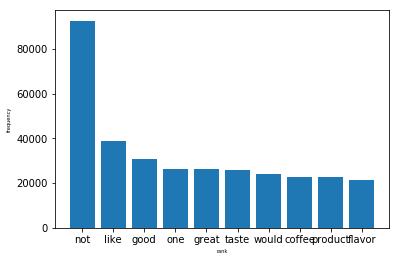

In [0]:
import matplotlib.pyplot as plt
plt.bar(top_freq,index_freq)
plt.xlabel('rank', fontsize=5)
plt.ylabel('frequency', fontsize=5)
#plt.xticks(index, label, fontsize=5, rotation=30)
#plt.title('Market Share for Each Genre 1995-2017')
plt.show()

In [0]:
a=len(desc_sort)

In [0]:
print(a)

54922


Now we will assign rank to each word in the text

In [0]:

rank_dict=dict()
rank_by_freq=1
for k in range(a):
    word=desc_sort[k][0]
    rank_dict[word]=rank_by_freq
    rank_by_freq=rank_by_freq+1


In [0]:
#Here we transform the matrix by substituting the words by their ranks.
converted_matrix=[]
for sentance in final['review_text']:
    vect_sent=[]
    for k in sentance.split():
        vect_sent.append(rank_dict[k])
    converted_matrix.append(vect_sent)

In [0]:
len(converted_matrix)

87773

In [0]:
review=pd.read_csv(r"drive/My Drive/Reviews.csv")

In [0]:
len(review['Score'])

87773

In [0]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(converted_matrix,review['Score'],test_size = 0.3,random_state = 0,shuffle = False)

In [0]:
# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout
# fix random seed for reproducibility
numpy.random.seed(7)

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):    
  ax.plot(x, vy, 'b', label="Validation Loss")    
  ax.plot(x, ty, 'r', label="Train Loss")    
  plt.legend()    
  plt.grid()    
  fig.canvas.draw()


In [0]:
# truncate and/or pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(61441, 600)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [0]:
# create the model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(54923, embedding_vector_length, input_length=max_review_length))
model.add(Dropout(0.45))
model.add(LSTM(100))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 32)           1757536   
_________________________________________________________________
dropout_1 (Dropout)          (None, 600, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,810,837
Trainable params: 1,810,837
Non-trainable params: 0
___________

In [0]:
history=model.fit(X_train, Y_train, epochs=10, batch_size=64,verbose=1,validation_data=(X_test, Y_test))
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 61441 samples, validate on 26332 samples
Epoch 1/10
61441/61441 [==============================] - 946s 15ms/step - loss: 0.2572 - acc: 0.8991 - val_loss: 0.2110 - val_acc: 0.9160
Epoch 2/10
61441/61441 [==============================] - 956s 16ms/step - loss: 0.1741 - acc: 0.9342 - val_loss: 0.2367 - val_acc: 0.9082
Epoch 3/10
61441/61441 [==============================] - 948s 15ms/step - loss: 0.1465 - acc: 0.9454 - val_loss: 0.2168 - val_acc: 0.9103
Epoch 4/10
61441/61441 [==============================] - 947s 15ms/step - loss: 0.1250 - acc: 0.9545 - val_loss: 0.2273 - val_acc: 0.9161
Epoch 5/10
61441/61441 [==============================] - 946s 15ms/step - loss: 0.1080 - acc: 0.9617 - val_loss: 0.2775 - val_acc: 0.9097
Epoch 6/10
61441/61441 [==============================] - 948s 15ms/step - loss: 0.0956 - acc: 0.9656 - val_loss: 0.2482 - val_acc: 0.9059
Epoch 7/10
61441/61441 [==============================] - 945s 15ms/step - loss: 0.0875 - acc: 0.9691 - val_loss: 0.

Test score: 0.3284348753419158
Test accuracy: 0.9055142032598519


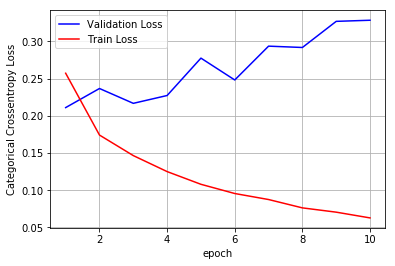

In [0]:
epochs=10
print('Test score:', scores[0]) 
print('Test accuracy:', scores[1])
 
fig,ax = plt.subplots(1,1) 
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
 
# list of epoch numbers 
x = list(range(1,epochs+1))

vy = history.history['val_loss'] 
ty = history.history['loss'] 
plt_dynamic(x, vy, ty, ax)
 

In [0]:
#Reference:https://github.com/keras-team/keras/issues/7403
# create the model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(54923, embedding_vector_length, input_length=max_review_length))
model.add(Dropout(0.6))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 600, 32)           1757536   
_________________________________________________________________
dropout_13 (Dropout)         (None, 600, 32)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 600, 100)          53200     
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 1,891,237
Trainable params: 1,891,237
Non-trainable params: 0
_________________________________________________________________


In [52]:
history=model.fit(X_train, Y_train, epochs=10, batch_size=64,verbose=1,validation_data=(X_test, Y_test))
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 61441 samples, validate on 26332 samples
Epoch 1/10
61441/61441 [==============================] - 1904s 31ms/step - loss: 0.2684 - acc: 0.8963 - val_loss: 0.2173 - val_acc: 0.9146
Epoch 2/10
61441/61441 [==============================] - 1891s 31ms/step - loss: 0.1838 - acc: 0.9287 - val_loss: 0.2091 - val_acc: 0.9163
Epoch 3/10
61441/61441 [==============================] - 1887s 31ms/step - loss: 0.1546 - acc: 0.9420 - val_loss: 0.2214 - val_acc: 0.9157
Epoch 4/10
61441/61441 [==============================] - 1884s 31ms/step - loss: 0.1394 - acc: 0.9484 - val_loss: 0.2098 - val_acc: 0.9162
Epoch 5/10
61441/61441 [==============================] - 1863s 30ms/step - loss: 0.1250 - acc: 0.9530 - val_loss: 0.2200 - val_acc: 0.9139
Epoch 6/10
61441/61441 [==============================] - 1892s 31ms/step - loss: 0.1145 - acc: 0.9575 - val_loss: 0.2188 - val_acc: 0.9100
Epoch 7/10
61441/61441 [==============================] - 1976s 32ms/step - loss: 0.1124 - acc: 0.9592 - val_l

Test score: 0.25996791752917997
Test accuracy: 0.912122132793379


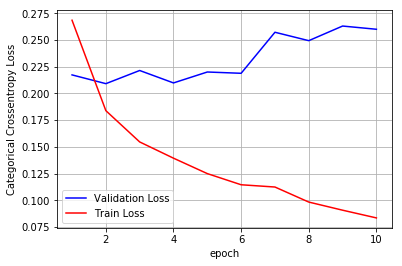

In [53]:
epochs=10
print('Test score:', scores[0]) 
print('Test accuracy:', scores[1])
 
fig,ax = plt.subplots(1,1) 
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
 
# list of epoch numbers 
x = list(range(1,epochs+1))

vy = history.history['val_loss'] 
ty = history.history['loss'] 
plt_dynamic(x, vy, ty, ax)
 

In [21]:
# reference from "http://zetcode.com/python/prettytable/"
from prettytable import PrettyTable
t = PrettyTable()
t.field_names = ["No.of.layers and no.of.lstm.units","Dropouts values", "test_accuracy" ]
t.add_row(["one layer with 100 units", "(0.45,0.6)",0.9051])
t.add_row(["two layers with 100 units", "(0.6,0.6)",0.9121])
print(t)

+-----------------------------------+-----------------+---------------+
| No.of.layers and no.of.lstm.units | Dropouts values | test_accuracy |
+-----------------------------------+-----------------+---------------+
|      one layer with 100 units     |    (0.45,0.6)   |     0.9051    |
|     two layers with 100 units     |    (0.6,0.6)    |     0.9121    |
+-----------------------------------+-----------------+---------------+
